In [ ]:
# Importing necessary libraries
from keras.preprocessing.image import img_to_array, array_to_img
from sklearn.preprocessing import LabelBinarizer, MinMaxScaler
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import glob
import cv2
import os
from keras.models import Sequential, Model
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Dropout, Dense, Flatten, Input, concatenate
from keras.preprocessing.image import load_img, img_to_array
from babel.numbers import format_currency
from skimage.transform import resize

from google.colab import drive
drive.mount('/content/gdrive')  # Mounting Google Drive

Mounted at /content/gdrive


In [ ]:
import pandas as pd

# Path to the CSV file
file_path = '/content/gdrive/MyDrive/pfa/data.csv'

# Columns to use
cols = ["price"]

# Load only the "price" column
df = pd.read_csv(file_path, usecols=cols)

# Display the first few rows for verification
print(df.head())

# Display the data types of each column
print(df.dtypes)

# Display the final number of rows in the DataFrame
final_row_count = len(df)
print("Final number of rows in the DataFrame:", final_row_count)


    price
0  869500
1  865200
2  889000
3  910000
4  971226
price    int64
dtype: object
Final number of rows in the DataFrame: 535


In [ ]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Select the "price" column and perform scaling
df["price"] = scaler.fit_transform(df[["price"]])

# Display the first few rows for verification
print(df.head())


      price
0  0.145219
1  0.144483
2  0.148561
3  0.152159
4  0.162650


In [ ]:
import os
import glob
import cv2
import numpy as np

# Load house images
images = []

# Iterate over houses
for i in df.index.values:
    # Base path for current house images
    basePath = os.path.sep.join(['/content/gdrive/MyDrive/pfa/photos/', "{}_*".format(i + 1)])
    # Find paths to house images
    housePaths = sorted(glob.glob(basePath))

    # Check if no image found for this house
    if not housePaths:
        print(f"No image files found for house {i + 1}")
        continue

    print(f"Number of image paths for house {i + 1}: {len(housePaths)}")

    # Load original images without resizing
    inputImages = [cv2.imread(housePath) for housePath in housePaths]

    print(f"Number of images loaded for house {i + 1}: {len(inputImages)}")

    # Check if any images are missing (at least 4 images are required)
    while len(inputImages) < 4:
        # Duplicate the first image if necessary to reach 4 images
        inputImages.append(inputImages[0].copy())

    # Resize each image to (180, 120) and convert to RGB
    resizedImages = [cv2.cvtColor(cv2.resize(img, (180, 120), interpolation=cv2.INTER_CUBIC), cv2.COLOR_BGR2RGB) for img in inputImages]

    # Create a final image with required size
    outputImage = np.zeros((240, 360, 3), dtype="uint8")

    # Assign resized images to parts of the final image
    outputImage[:120, :180] = resizedImages[0]  # Top-left corner
    outputImage[:120, 180:] = resizedImages[1]  # Top-right corner
    outputImage[120:, 180:] = resizedImages[2]  # Bottom-right corner
    outputImage[120:, :180] = resizedImages[3]  # Bottom-left corner

    # Add the final image to the list of images
    images.append(outputImage)

# Convert the list of images into a NumPy array and normalize pixel values
images = np.array(images) / 255.0


Number of image paths for house 1: 4
Number of images loaded for house 1: 4
Number of image paths for house 2: 4
Number of images loaded for house 2: 4
Number of image paths for house 3: 4
Number of images loaded for house 3: 4
Number of image paths for house 4: 4
Number of images loaded for house 4: 4
Number of image paths for house 5: 4
Number of images loaded for house 5: 4
Number of image paths for house 6: 4
Number of images loaded for house 6: 4
Number of image paths for house 7: 4
Number of images loaded for house 7: 4
Number of image paths for house 8: 4
Number of images loaded for house 8: 4
Number of image paths for house 9: 4
Number of images loaded for house 9: 4
Number of image paths for house 10: 4
Number of images loaded for house 10: 4
Number of image paths for house 11: 4
Number of images loaded for house 11: 4
Number of image paths for house 12: 4
Number of images loaded for house 12: 4
Number of image paths for house 13: 4
Number of images loaded for house 13: 4
Numb

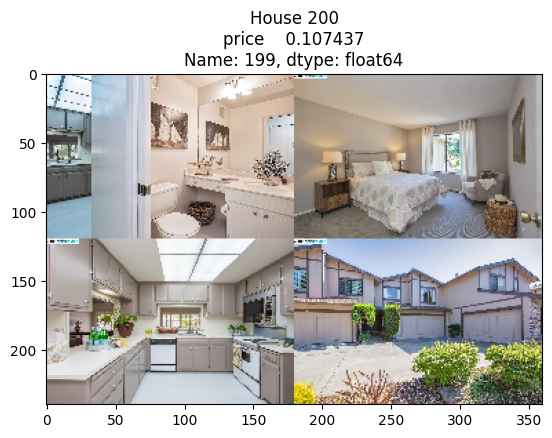

In [ ]:
import matplotlib.pyplot as plt

# Index of the house you want to visualize
house_to_visualize = 199  # To visualize the fourth house, index is 3

# Attributes of the house
house_attributes = df.iloc[house_to_visualize]

# Image of the house
house_image = images[house_to_visualize]

# Save the image with adjusted resolution
plt.imsave('house.png', house_image, dpi=300)

# Display the saved image
img = plt.imread('house.png')
plt.imshow(img)
plt.title(f'House {house_to_visualize + 1}\n{house_attributes}')
plt.show()

# Ensure using only as many samples as images
df = df.head(len(images))


In [ ]:
# Data partitioning
split = train_test_split(df, images, test_size=0.25, random_state=42)
(trainAttrX, testAttrX, trainImagesX, testImagesX) = split

# Normalize prices by the maximum price in training data
maxPrice = trainAttrX["price"].max()
trainY = trainAttrX["price"] / maxPrice
testY = testAttrX["price"] / maxPrice


• Deciding on the network topology

Training with architecture = [1]
Training with architecture = [1, 2]
Training with architecture = [2, 2, 2]
Best model (architecture = [1, 2]) with minimal validation loss (MAE): 0.20784541964530945
Best model (architecture = [1, 2]) with minimal validation RMSE: 0.2648065242655801


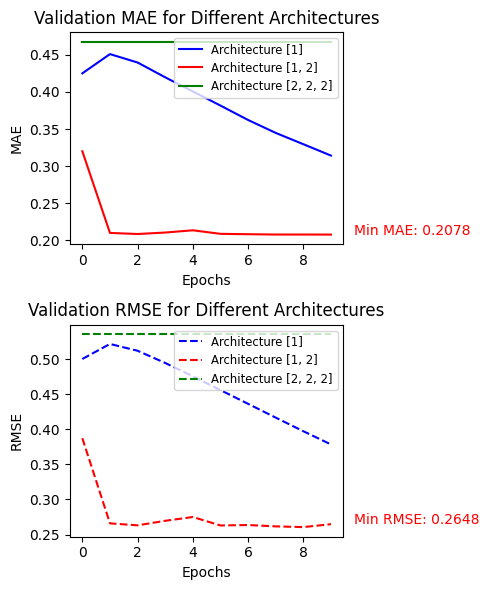

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from skimage.transform import resize

# Sample data for illustration (replace with your actual data)
trainImagesX = np.random.rand(100, 240, 360, 3)
testImagesX = np.random.rand(20, 240, 360, 3)
trainY = np.random.rand(100)  # Example: regression target

# Resize images for consistency (adjust dimensions as needed)
trainImagesX_resized = np.array([resize(img, (120, 180, 3)) for img in trainImagesX])
testImagesX_resized = np.array([resize(img, (120, 180, 3)) for img in testImagesX])

# Constants
batch_size = 32
learning_rate = 0.001
architectures = [
    [1],
    [1, 2],
    [2, 2, 2]
]

# Dictionaries to store training histories and models
histories = {}
best_model = None
best_loss_mae = float('inf')  # Initialize with infinity for MAE
best_loss_rmse = float('inf')  # Initialize with infinity for RMSE
best_architecture = None

# Create subplots for MAE and RMSE separately
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 6))

colors = ['blue', 'red', 'green']  # Colors for each architecture

for idx, architecture in enumerate(architectures):
    print(f"Training with architecture = {architecture}")

    # Create CNN model with the specified architecture
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(120, 180, 3)))
    model.add(MaxPooling2D((2, 2)))

    for filters in architecture:
        model.add(Conv2D(filters, (3, 3), activation='relu'))
        model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='relu'))  # Output layer with relu activation for regression

    # Compile the model with Adam optimizer and mean squared error loss
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=["mae", "mse"])

    # Train the model
    history = model.fit(trainImagesX_resized, trainY, validation_split=0.2, epochs=10, batch_size=batch_size, verbose=0)

    # Store training history for the current architecture
    histories[tuple(architecture)] = history

    # Plot validation MAE for the current architecture
    ax1.plot(history.history['val_mae'], label=f'Architecture {architecture}', color=colors[idx])

    # Plot validation RMSE for the current architecture
    ax2.plot(np.sqrt(history.history['val_mse']), label=f'Architecture {architecture}', linestyle='--', color=colors[idx])

    # Get the final validation loss (MAE and RMSE)
    final_loss_mae = history.history['val_mae'][-1]
    final_loss_rmse = np.sqrt(history.history['val_mse'][-1])

    # Check if this model has the best MAE so far
    if final_loss_mae < best_loss_mae:
        best_loss_mae = final_loss_mae
        best_model = model
        best_architecture = architecture

    # Check if this model has the best RMSE so far
    if final_loss_rmse < best_loss_rmse:
        best_loss_rmse = final_loss_rmse

# Find the index of the best architecture
best_architecture_index = architectures.index(best_architecture)

# Get the color corresponding to the best architecture
best_color = colors[best_architecture_index]

# Display the best model with its architecture and minimal validation losses
print(f"Best model (architecture = {best_architecture}) with minimal validation loss (MAE): {best_loss_mae}")
print(f"Best model (architecture = {best_architecture}) with minimal validation RMSE: {best_loss_rmse}")

# Annotate the minimal MAE and RMSE values on the plots using the best_color
ax1.annotate(f'Min MAE: {best_loss_mae:.4f}', xy=(1, best_loss_mae), xytext=(8, 0),
             xycoords=('axes fraction', 'data'), textcoords='offset points', fontsize=10, color=best_color)
ax2.annotate(f'Min RMSE: {best_loss_rmse:.4f}', xy=(1, best_loss_rmse), xytext=(8, 0),
             xycoords=('axes fraction', 'data'), textcoords='offset points', fontsize=10, color=best_color)

# Configure the first plot (MAE) with legend
ax1.set_title('Validation MAE for Different Architectures')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('MAE')
ax1.legend(loc='upper right', fontsize='small')
ax1.grid(False)

# Configure the second plot (RMSE) with legend
ax2.set_title('Validation RMSE for Different Architectures')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('RMSE')
ax2.legend(loc='upper right', fontsize='small')
ax2.grid(False)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()



• Adjusting optimizer:Learning rate

Training with learning_rate = 0.001
Training with architecture = [1, 2]
Training with learning_rate = 0.01
Training with architecture = [1, 2]
Training with learning_rate = 0.1
Training with architecture = [1, 2]
Best model (architecture = [1, 2], learning_rate = 0.01) with minimal validation loss (MAE): 0.25956782698631287
Best model (architecture = [1, 2], learning_rate = 0.01) with minimal validation RMSE: 0.285700970152108


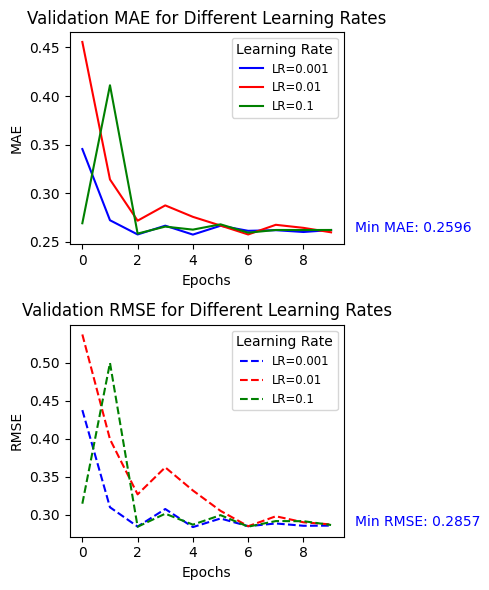

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from skimage.transform import resize

# Sample data for illustration (replace with your actual data)
trainImagesX = np.random.rand(100, 240, 360, 3)
testImagesX = np.random.rand(20, 240, 360, 3)
trainY = np.random.rand(100)  # Example: regression target

# Resize images for consistency (adjust dimensions as needed)
trainImagesX_resized = np.array([resize(img, (120, 180, 3)) for img in trainImagesX])
testImagesX_resized = np.array([resize(img, (120, 180, 3)) for img in testImagesX])

# Constants
batch_size = 32
architectures = [
    [1, 2]  # Fixed architecture
]
learning_rates = [0.001, 0.01, 0.1]  # Different learning rates to try

# Dictionaries to store training histories and models
histories = {}
best_model = None
best_loss_mae = float('inf')  # Initialize with infinity for MAE
best_loss_rmse = float('inf')  # Initialize with infinity for RMSE
best_architecture = None
best_learning_rate = None

# Create subplots for MAE and RMSE separately
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 6))

colors = ['blue', 'red', 'green']  # Colors for each learning rate

for lr_idx, learning_rate in enumerate(learning_rates):
    print(f"Training with learning_rate = {learning_rate}")

    for idx, architecture in enumerate(architectures):
        print(f"Training with architecture = {architecture}")

        # Create CNN model with the specified architecture
        model = Sequential()
        model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(120, 180, 3)))
        model.add(MaxPooling2D((2, 2)))

        for filters in architecture:
            model.add(Conv2D(filters, (3, 3), activation='relu'))
            model.add(MaxPooling2D((2, 2)))

        model.add(Flatten())
        model.add(Dense(128, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(1, activation='relu'))  # Output layer with relu activation for regression

        # Compile the model with Adam optimizer and mean squared error loss
        optimizer = Adam(learning_rate=learning_rate)
        model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=["mae", "mse"])

        # Train the model
        history = model.fit(trainImagesX_resized, trainY, validation_split=0.2, epochs=10, batch_size=batch_size, verbose=0)

        # Store training history for the current architecture
        histories[(tuple(architecture), learning_rate)] = history

        # Plot validation MAE for the current architecture
        ax1.plot(history.history['val_mae'], label=f'LR={learning_rate}', color=colors[lr_idx])

        # Plot validation RMSE for the current architecture
        ax2.plot(np.sqrt(history.history['val_mse']), label=f'LR={learning_rate}', linestyle='--', color=colors[lr_idx])

        # Get the final validation loss (MAE and RMSE)
        final_loss_mae = history.history['val_mae'][-1]
        final_loss_rmse = np.sqrt(history.history['val_mse'][-1])

        # Check if this model has the best MAE so far
        if final_loss_mae < best_loss_mae:
            best_loss_mae = final_loss_mae
            best_model = model
            best_architecture = architecture
            best_learning_rate = learning_rate

        # Check if this model has the best RMSE so far
        if final_loss_rmse < best_loss_rmse:
            best_loss_rmse = final_loss_rmse

# Find the index of the best architecture
best_architecture_index = architectures.index(best_architecture)

# Get the color corresponding to the best architecture
best_color = colors[best_architecture_index]

# Display the best model with its architecture and minimal validation losses
print(f"Best model (architecture = {best_architecture}, learning_rate = {best_learning_rate}) with minimal validation loss (MAE): {best_loss_mae}")
print(f"Best model (architecture = {best_architecture}, learning_rate = {best_learning_rate}) with minimal validation RMSE: {best_loss_rmse}")

# Annotate the minimal MAE and RMSE values on the plots using the best_color
ax1.annotate(f'Min MAE: {best_loss_mae:.4f}', xy=(1, best_loss_mae), xytext=(8, 0),
             xycoords=('axes fraction', 'data'), textcoords='offset points', fontsize=10, color=best_color)
ax2.annotate(f'Min RMSE: {best_loss_rmse:.4f}', xy=(1, best_loss_rmse), xytext=(8, 0),
             xycoords=('axes fraction', 'data'), textcoords='offset points', fontsize=10, color=best_color)

# Configure the first plot (MAE) with legend
ax1.set_title('Validation MAE for Different Learning Rates')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('MAE')
ax1.legend(loc='upper right', fontsize='small', title='Learning Rate')
ax1.grid(False)

# Configure the second plot (RMSE) with legend
ax2.set_title('Validation RMSE for Different Learning Rates')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('RMSE')
ax2.legend(loc='upper right', fontsize='small', title='Learning Rate')
ax2.grid(False)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()



.Deciding on the batch size

Training with batch_size = 16
Training with architecture = [1, 2]
Training with batch_size = 32
Training with architecture = [1, 2]
Training with batch_size = 64
Training with architecture = [1, 2]
Best model (architecture = [1, 2], batch_size = 16) with minimal validation loss (MAE): 0.30375346541404724
Best model (architecture = [1, 2], batch_size = 16) with minimal validation RMSE: 0.33269199374609415


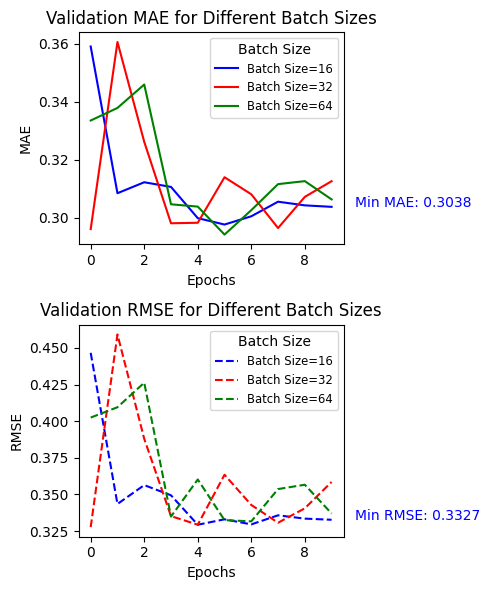

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from skimage.transform import resize

# Sample data for illustration (replace with your actual data)
trainImagesX = np.random.rand(100, 240, 360, 3)
testImagesX = np.random.rand(20, 240, 360, 3)
trainY = np.random.rand(100)  # Example: regression target

# Resize images for consistency (adjust dimensions as needed)
trainImagesX_resized = np.array([resize(img, (120, 180, 3)) for img in trainImagesX])
testImagesX_resized = np.array([resize(img, (120, 180, 3)) for img in testImagesX])

# Constants
architectures = [
    [1, 2]  # Fixed architecture
]
learning_rate = 0.001
batch_sizes = [16, 32, 64]  # Different batch sizes to try

# Dictionaries to store training histories and models
histories = {}
best_model = None
best_loss_mae = float('inf')  # Initialize with infinity for MAE
best_loss_rmse = float('inf')  # Initialize with infinity for RMSE
best_batch_size = None

# Create subplots for MAE and RMSE separately
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 6))

colors = ['blue', 'red', 'green']  # Colors for each batch size

for bs_idx, batch_size in enumerate(batch_sizes):
    print(f"Training with batch_size = {batch_size}")

    for idx, architecture in enumerate(architectures):
        print(f"Training with architecture = {architecture}")

        # Create CNN model with the specified architecture
        model = Sequential()
        model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(120, 180, 3)))
        model.add(MaxPooling2D((2, 2)))

        for filters in architecture:
            model.add(Conv2D(filters, (3, 3), activation='relu'))
            model.add(MaxPooling2D((2, 2)))

        model.add(Flatten())
        model.add(Dense(128, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(1, activation='relu'))  # Output layer with relu activation for regression

        # Compile the model with Adam optimizer and mean squared error loss
        optimizer = Adam(learning_rate=learning_rate)
        model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=["mae", "mse"])

        # Train the model
        history = model.fit(trainImagesX_resized, trainY, validation_split=0.2, epochs=10, batch_size=batch_size, verbose=0)

        # Store training history for the current architecture and batch size
        histories[(tuple(architecture), batch_size)] = history

        # Plot validation MAE for the current architecture
        ax1.plot(history.history['val_mae'], label=f'Batch Size={batch_size}', color=colors[bs_idx])

        # Plot validation RMSE for the current architecture
        ax2.plot(np.sqrt(history.history['val_mse']), label=f'Batch Size={batch_size}', linestyle='--', color=colors[bs_idx])

        # Get the final validation loss (MAE and RMSE)
        final_loss_mae = history.history['val_mae'][-1]
        final_loss_rmse = np.sqrt(history.history['val_mse'][-1])

        # Check if this model has the best MAE so far
        if final_loss_mae < best_loss_mae:
            best_loss_mae = final_loss_mae
            best_model = model
            best_architecture = architecture
            best_batch_size = batch_size

        # Check if this model has the best RMSE so far
        if final_loss_rmse < best_loss_rmse:
            best_loss_rmse = final_loss_rmse

# Find the index of the best architecture
best_architecture_index = architectures.index(best_architecture)

# Get the color corresponding to the best architecture
best_color = colors[best_architecture_index]

# Display the best model with its architecture and minimal validation losses
print(f"Best model (architecture = {best_architecture}, batch_size = {best_batch_size}) with minimal validation loss (MAE): {best_loss_mae}")
print(f"Best model (architecture = {best_architecture}, batch_size = {best_batch_size}) with minimal validation RMSE: {best_loss_rmse}")

# Annotate the minimal MAE and RMSE values on the plots using the best_color
ax1.annotate(f'Min MAE: {best_loss_mae:.4f}', xy=(1, best_loss_mae), xytext=(8, 0),
             xycoords=('axes fraction', 'data'), textcoords='offset points', fontsize=10, color=best_color)
ax2.annotate(f'Min RMSE: {best_loss_rmse:.4f}', xy=(1, best_loss_rmse), xytext=(8, 0),
             xycoords=('axes fraction', 'data'), textcoords='offset points', fontsize=10, color=best_color)

# Configure the first plot (MAE) with legend
ax1.set_title('Validation MAE for Different Batch Sizes')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('MAE')
ax1.legend(loc='upper right', fontsize='small', title='Batch Size')
ax1.grid(False)

# Configure the second plot (RMSE) with legend
ax2.set_title('Validation RMSE for Different Batch Sizes')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('RMSE')
ax2.legend(loc='upper right', fontsize='small', title='Batch Size')
ax2.grid(False)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()
